37 43 12 72 768
37 44 12 72 696
37 45 12 72 624
37 46 12 72 552
37 47 12 72 480
37 48 12 72 408
37 49 12 72 336
37 50 12 72 264
37 51 12 72 192
37 52 12 72 120
37 53 12 72 48
37 54 12 72 24
37 55 12 72 96
37 56 12 72 168
37 57 12 72 240
37 58 12 72 312
37 59 12 72 384
37 60 12 72 456
37 61 12 72 528
37 62 12 72 600
37 63 12 72 672
37 64 12 72 744
37 65 12 72 816
37 66 12 72 888
37 67 12 72 960
37 68 12 72 1032
37 69 12 72 1104
37 70 12 72 1176
37 71 12 72 1248
37 72 12 72 1320
37 73 12 72 1392
37 74 12 72 1464
37 75 12 72 1536
37 76 12 72 1608
37 77 12 72 1680
37 78 12 72 1752
37 79 12 72 1824
37 80 12 72 1896
37 81 12 72 1968
37 82 12 72 2040
37 83 12 72 2112
37 84 12 72 2184
37 85 12 72 2256
37 86 12 72 2328
37 87 12 72 2400
37 88 12 72 2472
37 89 12 72 2544
37 90 12 72 2616
37 91 12 72 2688
37 92 12 72 2760
37 93 12 72 2832
37 94 12 72 2904
37 95 12 72 2976
37 96 12 72 3048
37 97 12 72 3120
37 98 12 72 3192
37 99 12 72 3264
37 100 12 72 3336
37 101 12 72 3408
37 102 12 72 3480
37 10

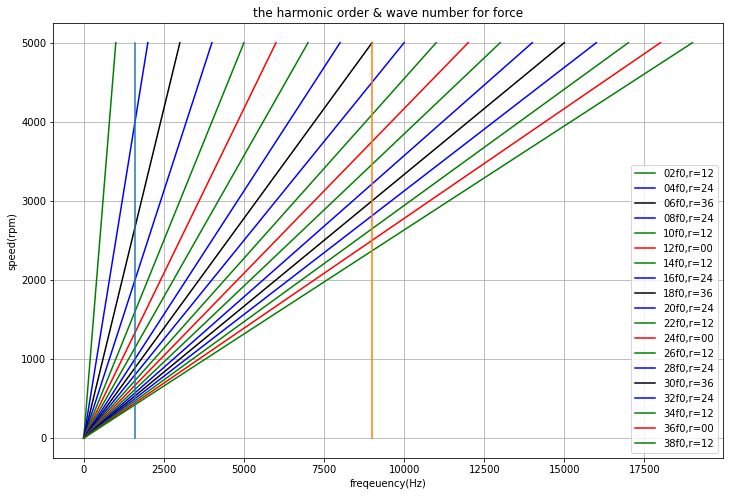

In [40]:
import pandas as pd
import numpy as np
import sympy as sym
import seaborn as sns 
import matplotlib as plt
import matplotlib.pyplot as plt

poles=12
slot=72
rpm=5000
u=60
v=60

fre_e=(rpm/60.)*(poles/2)
fre_r=(rpm/60.)
gcd=sym.gcd(poles,slot)

uu=np.arange(1,u+1) #time
vv=np.arange(-v,v+1) #space
uvtable=np.zeros((uu.size,vv.size),dtype='int')
for i in np.arange(uu.size):
    for j in np.arange(vv.size):
        uvtable[i,j]=np.abs(uu[i]*poles+vv[j]*slot)
        print (i,j,poles,slot,uvtable[i,j])

uvtab=pd.DataFrame(uvtable,columns=vv, index=uu)
uvtab

fslot=np.arange(2*fre_e,20000,2*fre_e) #20000Hz까지의 슬롯주파수
mmode=np.size(np.unique(np.min(uvtab,1))) 
modnum=np.unique(np.min(uvtab,1))[1] # 0을 제외한 두번째 작은값을 
color=['r','g','b','k','c','m','y'] #컬러리스트를 만든다.

#가장 작은 파수를 가지고 시간차수에 대해 찾는다.

aa=np.unique(np.min(uvtab,1))
bb=np.array(np.min(uvtable,1))

print(aa)
print(bb)

pcc=[]
for i in bb:
    for j in range(aa.size):
        if i==aa[j]:
            pcc.append(j)
pcc=np.array(pcc)
bb




plt.figure(figsize=(12,8))
for i in np.arange(fslot.size):
       if i<=u-1:
            plt.plot([0,fslot[i]],[0, rpm], color[pcc[i]], label='%02df0,r=%02d'% ((i+1)*2, bb[i]))
plt.plot([1600,1600],[0,rpm])
plt.plot([9000,9000],[0,rpm])
plt.title(u'the harmonic order & wave number for force')
plt.ylabel(u'speed(rpm)')
plt.xlabel(u'freqeuency(Hz)')
plt.grid('on')
plt.legend()


In [41]:
#가장 작은 파수를 가지는 차수들
low_ord=np.argwhere(bb==aa[1]).ravel()+1
print ('가장 저차를 갖는 주파수 차수:',low_ord*2)

#concern_rpm
rrpm=4800
fre_e=(rrpm/60.)*poles/2
print ('가장 저차를 갖는 주파수:', fre_e*low_ord*2)
print ('코깅주파수', rrpm*sym.lcm(poles,slot)/60)
print ('슬롯하모닉에 주파수:', fre_e*slot)


#x=np.arange(-1,1,0.1)
#y=np.arange(-1,1,0.1)
#X,Y=np.meshgrid(x,y)
#Z=np.exp(-(X**2+Y**2))
#CS=plt.contourf(X,Y,Z)



가장 저차를 갖는 주파수 차수: [  2  10  14  22  26  34  38  46  50  58  62  70  74  82  86  94  98 106
 110 118]
가장 저차를 갖는 주파수: [  960.  4800.  6720. 10560. 12480. 16320. 18240. 22080. 24000. 27840.
 29760. 33600. 35520. 39360. 41280. 45120. 47040. 50880. 52800. 56640.]
코깅주파수 5760
슬롯하모닉에 주파수: 34560.0


In [42]:
from matplotlib import cm
import pandas as pd

C=pd.read_csv("236Nm@213rpm_Radial_Force.csv",index=False)
#C.style.hide_index()

nrow=len(C)
ncol=C.shape[1]
X,Y= np.meshgrid(np.linspace(0,360,nrow), np.linspace(0,0.005,ncol))
fig, ax=plt.subplots()
fig.set_size_inches((15,10))
cset=ax.contourf(X,Y,C.T,zdir='z',offset=0,cmap=cm.jet)
ax.set_xlabel('angstep')
ax.set_ylabel('tstep')
plt.title(u'The space-time radial force density in air gap', fontproperties='Malgun Gothic', fontsize=14)
plt.show()

fig=plt.figure(figsize=(12,8))
ax=fig.add_subplot(1,1,1,projection='3d')
g=ax.plot_surface(X,Y,C.T/1000.,rstride=1,cstride=1,antialiased=False,alpha=1,cmap='jet')
ax.view_init(40,-60)
ax.set_zlim([0,1])
fig.tight_layout()
plt.colorbar(g,shrink=0.2)
plt.show()

TypeError: read_csv() got an unexpected keyword argument 'index'

In [ ]:
#2d FFT for the time-spatial radial force density
import numpy as np

ps=C.T
atemp_show=ps.head()
#type_show=ps.dtypes
ffs=np.fft.fftshift(abs(np.fft.fftn(ps)))*2/len(ps)
leng_temp=len(ps)
# 주파수가 0인 부분을 정중앙에 위치시키고 재배열해주는 함수이다.
Nx,Nt=ffs.shape
#Nnx,Nnt=ffs.shape
#shape (numpy) : 행렬의 차원 
Nx=int(Nx); Nt=int(Nt) #굳이?

waveno=72
timeno=20

f=np.fft.fftshift(np.fft.fftfreq(Nx,1/Nx))
f.astype(int)

k=np.fft.fftshift(np.fft.fftfreq(Nt,1/Nt))
fcent=int(np.argwhere(f==0))
#0이 아닌 배열 요소의 색인을 요소별로 그룹화하십시오.

kcent=int(np.argwhere(k==0))
ff=f[fcent-timeno:fcent+timeno]
kk=k[kcent-waveno:kcent+waveno]
aaa=-np.arange(ff[0],ff[-1]+1,dtype=np.int64)*poles
bbb=np.arange(kk[0],kk[-1]+1,dtype=np.int64)

sffs=ffs[fcent-timeno:fcent+timeno,kcent-waveno:kcent+waveno]
sffs[sffs<0.1]=0 
fig, ax =plt.subplots()
fig.set_size_inches((80,40))
ax.set_xticks(np.arange(kk.size)+0.5)
ax.set_xticklabels(bbb,fontsize=10)
ax.set_yticks(np.arange(ff.size)+0.5)
ax.set_yticklabels(aaa,fontsize=10)
plt.pcolor(sffs,edgecolors='k', linewidth=1,cmap=cm.jet,) #,cmap='tab20'
plt.xlabel('wavenumber',fontsize=10)
plt.ylabel('time number', fontsize=10)

plt.gca().invert_yaxis()
plt.colorbar()
plt.show()





